Script for creating visualisation

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load geometry data
vic_geo_df = gpd.read_file('../data/VIC_LOCALITY_POLYGON_shp.geojson')

In [14]:
vic_geo_df.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,VIC_LGA_sh,VIC_LGA__1,VIC_LGA__2,VIC_LGA__3,VIC_LGA__4,VIC_LGA__5,geometry
0,452,2017-09-08,None,VIC245,2017-09-08,None,FALLS CREEK ALPINE RESORT (UNINCORPORATED),FALLS CREEK ALPINE RESORT (UNINC),None,2,"POLYGON ((147.24172 -36.86703, 147.24202 -36.8..."
1,465,2017-09-08,None,VIC246,2017-09-08,None,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12999, 146.46062 -37.1..."
2,475,2017-09-08,None,VIC231,2017-09-08,None,CORANGAMITE SHIRE,CORANGAMITE,None,2,"POLYGON ((143.47180 -38.28086, 143.47117 -38.2..."
3,480,2017-09-08,None,VIC226,2017-09-08,None,KINGSTON CITY,KINGSTON,None,2,"POLYGON ((145.10925 -38.04438, 145.10912 -38.0..."
4,481,2017-09-08,None,VIC227,2017-09-08,None,FRANKSTON CITY,FRANKSTON,None,2,"POLYGON ((145.10531 -38.15533, 145.10556 -38.1..."


In [18]:
# load active cases data
df_all_dates = pd.read_csv('../data/all_dates.csv')

In [19]:
df_all_dates.head()

,lga,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,...,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01
0,ALPINE,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,ARARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,1,1.0
2,BALLARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,11,11,11,10,10,10,10,10,11.0
3,BANYULE,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,140,139,147,153,151,144,144,144,141,146.0
4,BASS COAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,2,2,3,4,5.0


In [28]:
vic_geo_df = pd.merge(vic_geo_df[['VIC_LGA__3', 'geometry']], df_all_dates[['lga', '2020-08-01']], how = 'inner', left_on = 'VIC_LGA__3', right_on = 'lga', sort = True)

In [29]:
vic_geo_df.to_csv('test.csv')

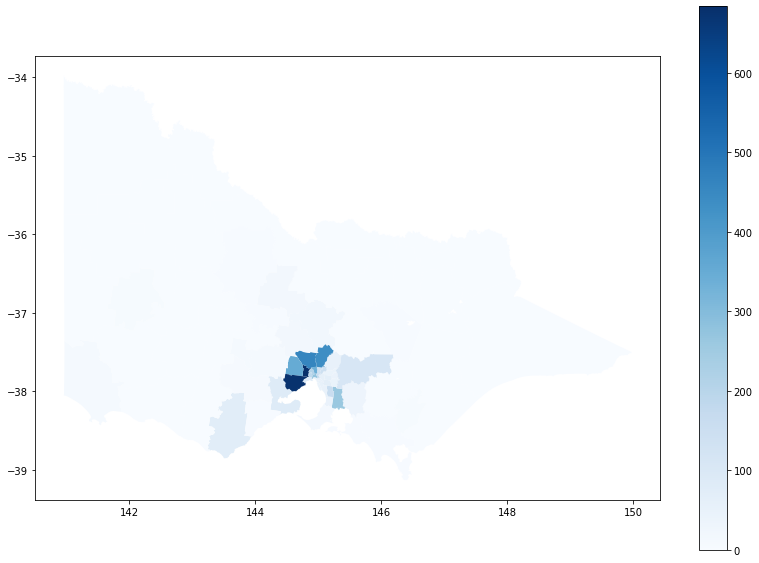

In [44]:
img = vic_geo_df.plot(figsize = (14,10), column = '2020-08-01', legend = True, cmap = 'Blues')
plt.savefig('test.png')